<a href="https://colab.research.google.com/github/Khushkataruka/Machine-Learning-SVNIT/blob/main/ML_LAB_5_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [147]:
import numpy as np

class LinearRegression:
    def __init__(self):
        self.w = None
        self.b = 0
        self.learning_rate = 1e-3

    def fit(self, X_train, y_train, X_val=None, y_val=None, lr=1e-3, epochs=1000):
        X_train = np.array(X_train)
        y_train = np.array(y_train).reshape(-1, 1)  # Ensure shape (n_samples, 1)
        self.learning_rate = lr

        n_samples, n_features = X_train.shape
        self.w = np.zeros((n_features, 1))
        self.b = 0

        for epoch in range(epochs):
            y_pred = np.dot(X_train, self.w) + self.b

            loss = np.mean((y_train - y_pred) ** 2)

            dw = (2 / n_samples) * np.dot(X_train.T, (y_pred - y_train))
            db = (2 / n_samples) * np.sum(y_pred - y_train)

            # Update weights and bias
            self.w -= self.learning_rate * dw
            self.b -= self.learning_rate * db

            if epoch % 100 == 0 or epoch == epochs - 1:
                print(f"Epoch {epoch}, Loss: {loss:.4f}")

        if X_val is not None and y_val is not None:
            y_val_pred = self.predict(X_val, return_raw=True)
            val_loss = np.mean((np.array(y_val).reshape(-1, 1) - y_val_pred) ** 2)
            print(f"\nValidation Loss: {val_loss:.4f}")

    def predict(self, X, return_raw=False,threshhold=0.3):
        X = np.array(X)
        y_pred = np.dot(X, self.w) + self.b
        y_pred=y_pred
        if return_raw:
            return y_pred
        return (y_pred > threshhold).astype(int)


In [148]:
import kagglehub
from kagglehub import KaggleDatasetAdapter
import pandas as pd

# Load the dataset
file_path = "Iris.csv"
df_raw = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "uciml/iris",
  file_path
)

# --- CORRECTION ---
# Drop the 'Id' column as it is not a feature for prediction.
df = df_raw.drop('Id', axis=1)

print("First 5 records (after dropping 'Id'):")
print(df.head())

# Create the one-vs-rest dataframes
df_1 = df.copy()
df_1['Species'] = df_1['Species'].map({'Iris-setosa': 1, 'Iris-versicolor': 0, 'Iris-virginica': 0})

df_2 = df.copy()
df_2['Species'] = df_2['Species'].map({'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 0})

df_3 = df.copy()
df_3['Species'] = df_3['Species'].map({'Iris-setosa': 0, 'Iris-versicolor': 0, 'Iris-virginica': 1})

/tmp/ipython-input-2251450381.py:7: DeprecationWarning: Use dataset_load() instead of load_dataset(). load_dataset() will be removed in a future version.
  df_raw = kagglehub.load_dataset(


Using Colab cache for faster access to the 'iris' dataset.
First 5 records (after dropping 'Id'):
   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0            5.1           3.5            1.4           0.2  Iris-setosa
1            4.9           3.0            1.4           0.2  Iris-setosa
2            4.7           3.2            1.3           0.2  Iris-setosa
3            4.6           3.1            1.5           0.2  Iris-setosa
4            5.0           3.6            1.4           0.2  Iris-setosa


# Split the dataset
create a Binary Classifier to train the model on each category


<Axes: xlabel='Species', ylabel='Count'>

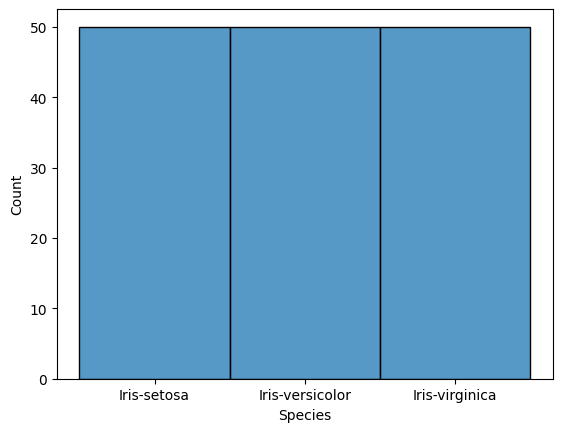

In [149]:
#view distribution of each class using histogram
import seaborn as sns
sns.histplot(df['Species'])

In [150]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X1 = df_1.drop('Species', axis=1)
y1 = df_1['Species']
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3, random_state=42)
X1_val, X1_test, y1_val, y1_test = train_test_split(X1_test, y1_test, test_size=0.5, random_state=42)

X2 = df_2.drop('Species', axis=1)
y2 = df_2['Species']
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3, random_state=42)
X2_val, X2_test, y2_val, y2_test = train_test_split(X2_test, y2_test, test_size=0.5, random_state=42)

X3 = df_3.drop('Species', axis=1)
y3 = df_3['Species']
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.3, random_state=42)
X3_val, X3_test, y3_val, y3_test = train_test_split(X3_test, y3_test, test_size=0.5, random_state=42)

# --- CORRECTION: Scale the features ---
scaler = StandardScaler()

# Fit on training data and transform all sets
X1_train_scaled = scaler.fit_transform(X1_train)
X1_val_scaled = scaler.transform(X1_val)
X1_test_scaled = scaler.transform(X1_test)

X2_train_scaled = scaler.fit_transform(X2_train)
X2_val_scaled = scaler.transform(X2_val)
X2_test_scaled = scaler.transform(X2_test)

X3_train_scaled = scaler.fit_transform(X3_train)
X3_val_scaled = scaler.transform(X3_val)
X3_test_scaled = scaler.transform(X3_test)

# Also create a scaled test set from the original data for final combined evaluation
X_orig = df.drop('Species', axis=1)
y_orig = df['Species']
X_train_orig, X_test_orig, y_train_orig, y_test_orig = train_test_split(X_orig, y_orig, test_size=0.3, random_state=42)
X_test_scaled = scaler.fit(X_train_orig).transform(X_test_orig) # Fit scaler on original training set

In [151]:
# Instantiate new models
model_1 = LinearRegression()
model_2 = LinearRegression()
model_3 = LinearRegression()

# --- CORRECTION: Use a larger learning rate and scaled data ---
print("--- Training Model 1 (for Iris-setosa) ---")
model_1.fit(X1_train_scaled, y1_train, X_val=X1_val_scaled, y_val=y1_val, lr=1e-2, epochs=1000)
print("\n--- Training Model 2 (for Iris-versicolor) ---")
model_2.fit(X2_train_scaled, y2_train, X_val=X2_val_scaled, y_val=y2_val, lr=1e-2, epochs=1000)
print("\n--- Training Model 3 (for Iris-virginica) ---")
model_3.fit(X3_train_scaled, y3_train, X_val=X3_val_scaled, y_val=y3_val, lr=1e-2, epochs=1000)

--- Training Model 1 (for Iris-setosa) ---
Epoch 0, Loss: 0.2952
Epoch 100, Loss: 0.0231
Epoch 200, Loss: 0.0208
Epoch 300, Loss: 0.0205
Epoch 400, Loss: 0.0203
Epoch 500, Loss: 0.0202
Epoch 600, Loss: 0.0201
Epoch 700, Loss: 0.0200
Epoch 800, Loss: 0.0199
Epoch 900, Loss: 0.0199
Epoch 999, Loss: 0.0198

Validation Loss: 0.0226

--- Training Model 2 (for Iris-versicolor) ---
Epoch 0, Loss: 0.3524
Epoch 100, Loss: 0.1732
Epoch 200, Loss: 0.1685
Epoch 300, Loss: 0.1676
Epoch 400, Loss: 0.1670
Epoch 500, Loss: 0.1667
Epoch 600, Loss: 0.1665
Epoch 700, Loss: 0.1663
Epoch 800, Loss: 0.1662
Epoch 900, Loss: 0.1660
Epoch 999, Loss: 0.1659

Validation Loss: 0.1176

--- Training Model 3 (for Iris-virginica) ---
Epoch 0, Loss: 0.3524
Epoch 100, Loss: 0.0973
Epoch 200, Loss: 0.0918
Epoch 300, Loss: 0.0902
Epoch 400, Loss: 0.0894
Epoch 500, Loss: 0.0889
Epoch 600, Loss: 0.0887
Epoch 700, Loss: 0.0886
Epoch 800, Loss: 0.0886
Epoch 900, Loss: 0.0885
Epoch 999, Loss: 0.0885

Validation Loss: 0.0514


In [152]:
y_test=model_1.predict(X1_test)


In [153]:
count = 0
for i in range(len(y_test)):
  if y_test[i] == y1_test.iloc[i]: # Use .iloc for position-based indexing
    count += 1
print(count/len(y_test))

1.0


In [154]:
y_test_2=model_2.predict(X2_test)
count = 0
for i in range(len(y_test_2)):
  if y_test_2[i] == y2_test.iloc[i]: # Use .iloc for position-based indexing
    count += 1
print(count/len(y_test_2))

0.5652173913043478


In [155]:
y_test_3=model_3.predict(X3_test)
count=0
for i in range(len(y_test_3)):
  if y_test_3[i] == y3_test.iloc[i]: # Use .iloc for position-based indexing
    count += 1
print(count/len(y_test_3))

0.30434782608695654


In [156]:

def predict_species(X):
  X = np.array(X)
  y1_raw = model_1.predict(X, return_raw=True).flatten()
  y2_raw = model_2.predict(X, return_raw=True).flatten()
  y3_raw = model_3.predict(X, return_raw=True).flatten()
  raw_predictions = np.vstack([y1_raw, y2_raw, y3_raw]).T
  predicted_indices = np.argmax(raw_predictions, axis=1)
  species_map = {0: 'Iris-setosa', 1: 'Iris-versicolor', 2: 'Iris-virginica'}
  predicted_species = np.array([species_map[index] for index in predicted_indices])
  return predicted_species

# --- CORRECTION: Predict on the scaled test set ---
y_pred_combined = predict_species(X_test_scaled)

# Calculate accuracy against the original species labels
accuracy_combined = (y_pred_combined == y_test_orig).mean()

print(f"✅ Accuracy of the corrected combined model: {accuracy_combined:.4f}")

✅ Accuracy of the corrected combined model: 0.8222


In [157]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


**Reasoning**:
Import the SMOTE class and apply it to the training data for each dataset with k_neighbors=1.



In [158]:
from imblearn.over_sampling import SMOTE

# Instantiate SMOTE with k_neighbors=1
smote_k1 = SMOTE(k_neighbors=1, random_state=42)

# Apply SMOTE to the training data for df_1
X1_resampled_k1, y1_resampled_k1 = smote_k1.fit_resample(X1_train, y1_train)

# Apply SMOTE to the training data for df_2
X2_resampled_k1, y2_resampled_k1 = smote_k1.fit_resample(X2_train, y2_train)

# Apply SMOTE to the training data for df_3
X3_resampled_k1, y3_resampled_k1 = smote_k1.fit_resample(X3_train, y3_train)

print("Shape of original X1_train:", X1_train.shape)
print("Shape of resampled X1_resampled_k1:", X1_resampled_k1.shape)
print("\nShape of original X2_train:", X2_train.shape)
print("Shape of resampled X2_resampled_k1:", X2_resampled_k1.shape)
print("\nShape of original X3_train:", X3_train.shape)
print("Shape of resampled X3_resampled_k1:", X3_resampled_k1.shape)

Shape of original X1_train: (105, 4)
Shape of resampled X1_resampled_k1: (148, 4)

Shape of original X2_train: (105, 4)
Shape of resampled X2_resampled_k1: (136, 4)

Shape of original X3_train: (105, 4)
Shape of resampled X3_resampled_k1: (136, 4)


## Train linear regression models (setting a)

### Subtask:
Train a `LinearRegression` model on each of the oversampled datasets created in the previous step.


**Reasoning**:
Instantiate and train the LinearRegression models on the oversampled datasets with the specified parameters.



In [159]:
model_1_smote_k1 = LinearRegression()
model_2_smote_k1 = LinearRegression()
model_3_smote_k1 = LinearRegression()

model_1_smote_k1.fit(X1_resampled_k1, y1_resampled_k1, X_val=X1_val, y_val=y1_val, lr=1e-2, epochs=1000)
model_2_smote_k1.fit(X2_resampled_k1, y2_resampled_k1, X_val=X2_val, y_val=y2_val, lr=1e-2, epochs=1000)
model_3_smote_k1.fit(X3_resampled_k1, y3_resampled_k1, X_val=X3_val, y_val=y3_val, lr=1e-2, epochs=1000)

Epoch 0, Loss: 0.5000
Epoch 100, Loss: 0.0174
Epoch 200, Loss: 0.0173
Epoch 300, Loss: 0.0172
Epoch 400, Loss: 0.0172
Epoch 500, Loss: 0.0171
Epoch 600, Loss: 0.0171
Epoch 700, Loss: 0.0170
Epoch 800, Loss: 0.0170
Epoch 900, Loss: 0.0170
Epoch 999, Loss: 0.0169

Validation Loss: 0.0191
Epoch 0, Loss: 0.5000
Epoch 100, Loss: 0.2359
Epoch 200, Loss: 0.2283
Epoch 300, Loss: 0.2225
Epoch 400, Loss: 0.2181
Epoch 500, Loss: 0.2146
Epoch 600, Loss: 0.2118
Epoch 700, Loss: 0.2096
Epoch 800, Loss: 0.2078
Epoch 900, Loss: 0.2063
Epoch 999, Loss: 0.2050

Validation Loss: 0.1477
Epoch 0, Loss: 0.5000
Epoch 100, Loss: 0.0982
Epoch 200, Loss: 0.0941
Epoch 300, Loss: 0.0914
Epoch 400, Loss: 0.0895
Epoch 500, Loss: 0.0882
Epoch 600, Loss: 0.0873
Epoch 700, Loss: 0.0866
Epoch 800, Loss: 0.0861
Epoch 900, Loss: 0.0857
Epoch 999, Loss: 0.0855

Validation Loss: 0.0530


## Evaluate performance (setting a)

### Subtask:
Evaluate the performance of each of the models trained in the previous step on their respective test sets and compare the results.


**Reasoning**:
Evaluate the performance of the trained models on the test sets and print the accuracies.



In [160]:
# Get predictions on the test sets
y1_pred_k1 = model_1_smote_k1.predict(X1_test)
y2_pred_k1 = model_2_smote_k1.predict(X2_test)
y3_pred_k1 = model_3_smote_k1.predict(X3_test)

# Reshape predictions to be 1-dimensional
y1_pred_k1 = y1_pred_k1.flatten()
y2_pred_k1 = y2_pred_k1.flatten()
y3_pred_k1 = y3_pred_k1.flatten()

# Calculate accuracies
accuracy_1_k1 = (y1_pred_k1 == y1_test).mean()
accuracy_2_k1 = (y2_pred_k1 == y2_test).mean()
accuracy_3_k1 = (y3_pred_k1 == y3_test).mean()

# Print accuracies
print(f"Accuracy of model_1_smote_k1: {accuracy_1_k1:.4f}")
print(f"Accuracy of model_2_smote_k1: {accuracy_2_k1:.4f}")
print(f"Accuracy of model_3_smote_k1: {accuracy_3_k1:.4f}")

Accuracy of model_1_smote_k1: 0.9565
Accuracy of model_2_smote_k1: 0.6522
Accuracy of model_3_smote_k1: 0.5652


In [161]:

def predict_species_smote(X):
    X = np.array(X)
    y1_raw = model_1_smote_k1.predict(X, return_raw=True).flatten()
    y2_raw = model_2_smote_k1.predict(X, return_raw=True).flatten()
    y3_raw = model_3_smote_k1.predict(X, return_raw=True).flatten()
    raw_predictions = np.vstack([y1_raw, y2_raw, y3_raw]).T
    predicted_indices = np.argmax(raw_predictions, axis=1)
    species_map = {0: 'Iris-setosa', 1: 'Iris-versicolor', 2: 'Iris-virginica'}
    predicted_species = np.array([species_map[index] for index in predicted_indices])
    return predicted_species
y_pred_combined_smote = predict_species_smote(X_test_scaled)
accuracy_combined_smote = (y_pred_combined_smote == y_test_orig).mean()

print(f"✅ Accuracy of the combined SMOTE model: {accuracy_combined_smote:.4f}")

✅ Accuracy of the combined SMOTE model: 0.8444


In [ ]:
# Find the nearest sample for any sample and then apply the SMOTE technique.


In [174]:
from sklearn.neighbors import NearestNeighbors

# Select a sample from the training data (e.g., the first sample of the resampled data)
sample_index = 0
sample = X1_resampled_k1.iloc[sample_index].values.reshape(1, -1)

# Instantiate NearestNeighbors with k=1 to find the single nearest neighbor
nn = NearestNeighbors(n_neighbors=2) # We look for 2 neighbors because the sample itself is the closest

# Fit the model on the resampled data
nn.fit(X1_resampled_k1)

# Find the nearest neighbors for the selected sample
distances, indices = nn.kneighbors(sample)

# The nearest neighbor (excluding the sample itself) is at index 1
nearest_neighbor_index = indices[0][1]
nearest_neighbor = X1_resampled_k1.iloc[nearest_neighbor_index]

print(f"Original sample (index {sample_index}):\n{sample.flatten()}")
print(f"\nNearest neighbor (index {nearest_neighbor_index}):\n{nearest_neighbor.values}")

Original sample (index 0):
[5.5 2.4 3.7 1. ]

Nearest neighbor (index 38):
[5.5 2.4 3.8 1.1]


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(


# Assignment 6


# 1. Take the Iris dataset that you used in the Assignment 5. Implement Macro, Micro,
Weighted F1-scores on this dataset based on the models developed in Assignment 5.
# 2. Take different thresholds (take thresholds starting from 0 to 1) on the predictions you got
from the models that you developed for Assignment 5 and create an ROC curve for it.
Find the Area Under Curve (AUC) for the ROC curve.
# 3. Using the normal equations, find the target values for the linear regression model on the
Iris dataset. Compute the Mean Absolute Error (MAE), Mean Squared Error (MSE), and
the R
2 error.

In [162]:
#weighted f1 score

In [163]:
from collections import Counter

def precision_recall_f1_per_class(y_true, y_pred, class_label):
    tp = sum((yt == class_label and yp == class_label) for yt, yp in zip(y_true, y_pred))
    fp = sum((yt != class_label and yp == class_label) for yt, yp in zip(y_true, y_pred))
    fn = sum((yt == class_label and yp != class_label) for yt, yp in zip(y_true, y_pred))

    precision = tp / (tp + fp) if (tp + fp) else 0.0
    recall = tp / (tp + fn) if (tp + fn) else 0.0
    f1 = 2 * precision * recall / (precision + recall) if (precision + recall) else 0.0

    return precision, recall, f1

def weighted_f1_score(y_true, y_pred):
    classes = sorted(set(y_true) | set(y_pred))  # all unique flower names
    support = Counter(y_true)
    total_support = sum(support.values())

    weighted_f1 = 0.0

    for cls in classes:
        _, _, f1 = precision_recall_f1_per_class(y_true, y_pred, cls)
        cls_support = support[cls]
        weighted_f1 += f1 * (cls_support / total_support)

    return weighted_f1


In [164]:
weighted_f1=weighted_f1_score(y_test_orig,y_pred_combined_smote)
weighted_f1

0.8403740193395366

In [170]:
import numpy as np
import matplotlib.pyplot as plt

# This helper function was already correct and is used by the new function.
def get_tpr_fpr(y_true, y_pred):
    # True positives: true is 1, pred is 1
    tp = sum((yt == 1 and yp == 1) for yt, yp in zip(y_true, y_pred))
    # False positives: true is 0, pred is 1
    fp = sum((yt == 0 and yp == 1) for yt, yp in zip(y_true, y_pred))
    # False negatives: true is 1, pred is 0
    fn = sum((yt == 1 and yp == 0) for yt, yp in zip(y_true, y_pred))
    # True negatives: true is 0, pred is 0
    tn = sum((yt == 0 and yp == 0) for yt, yp in zip(y_true, y_pred))

    tpr = tp / (tp + fn) if (tp + fn) else 0.0
    fpr = fp / (fp + tn) if (fp + tn) else 0.0

    return tpr, fpr

# --- CORRECTED FUNCTION ---
# This function replaces the flawed predict_species_threshhold and get_avg_tpr_fpr
def generate_roc_points(model, X_test, y_true):
    """
    Generates the points for an ROC curve for a single binary classifier.
    """
    y_scores = model.predict(X_test, return_raw=True).flatten()

    # Recommended: Use the model's unique scores as the thresholds for precision.
    # Fix: Pass a list to sorted()
    thresholds = np.arange(1, 0, -0.01)

    tpr_list = [0.0]
    fpr_list = [0.0]

    for thresh in thresholds:
        y_pred_binary = (y_scores >= thresh).astype(int)
        tpr, fpr = get_tpr_fpr(y_true, y_pred_binary)
        tpr_list.append(tpr)
        fpr_list.append(fpr)

    # Add the final point to ensure the curve goes to (1,1)
    tpr_list.append(1.0)
    fpr_list.append(1.0)

    return fpr_list, tpr_list

/tmp/ipython-input-2489282885.py:10: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  auc_score_1 = np.trapz(tprs1, fprs1)
/tmp/ipython-input-2489282885.py:11: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  auc_score_2 = np.trapz(tprs2, fprs2)
/tmp/ipython-input-2489282885.py:12: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  auc_score_3 = np.trapz(tprs3, fprs3)


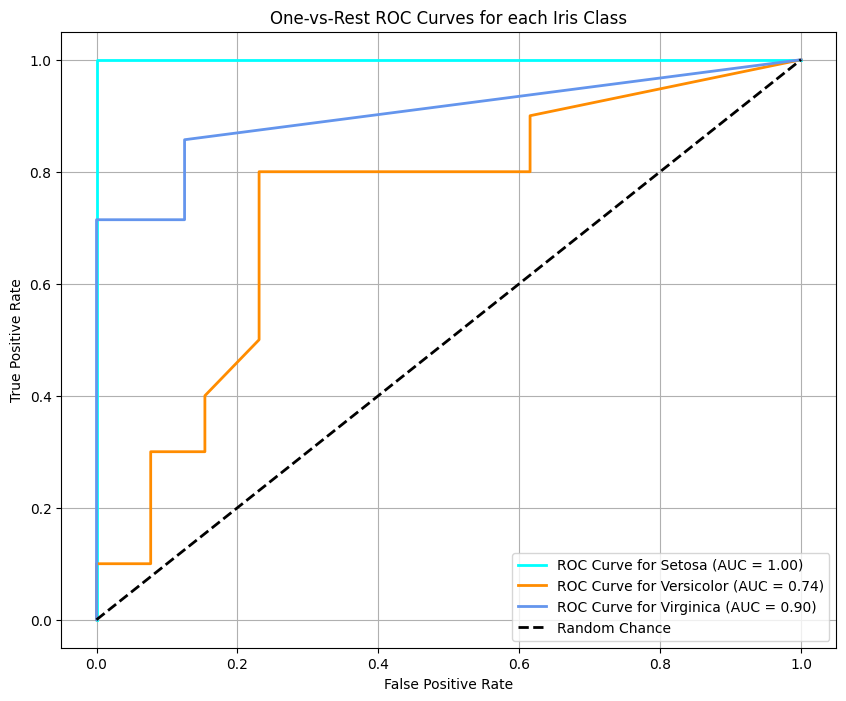

In [171]:
import matplotlib.pyplot as plt
import numpy as np

# --- 1. Generate ROC points and calculate AUC for each model ---
# (This part is from your code and is correct)
fprs1, tprs1 = generate_roc_points(model_1_smote_k1, X1_test_scaled, y1_test)
fprs2, tprs2 = generate_roc_points(model_2_smote_k1, X2_test_scaled, y2_test)
fprs3, tprs3 = generate_roc_points(model_3_smote_k1, X3_test_scaled, y3_test)

auc_score_1 = np.trapz(tprs1, fprs1)
auc_score_2 = np.trapz(tprs2, fprs2)
auc_score_3 = np.trapz(tprs3, fprs3)

# --- 2. Plot all three curves in a single figure ---
plt.figure(figsize=(10, 8))

# Plot Setosa ROC Curve
plt.plot(fprs1, tprs1, color='aqua', lw=2,
         label=f'ROC Curve for Setosa (AUC = {auc_score_1:.2f})')

# Plot Versicolor ROC Curve
plt.plot(fprs2, tprs2, color='darkorange', lw=2,
         label=f'ROC Curve for Versicolor (AUC = {auc_score_2:.2f})')

# Plot Virginica ROC Curve
plt.plot(fprs3, tprs3, color='cornflowerblue', lw=2,
         label=f'ROC Curve for Virginica (AUC = {auc_score_3:.2f})')

# Plot the random chance line
plt.plot([0, 1], [0, 1], 'k--', lw=2, label='Random Chance')

# Final plot settings
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('One-vs-Rest ROC Curves for each Iris Class')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

In [172]:
# Using the normal equations
# Add a column of ones to X_train for the intercept term
X_train_norm_eq = np.insert(X_train_orig.values, 0, 1, axis=1)
y_train_norm_eq = y_train_orig.map({'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}).values # Map species to numerical values

# Calculate weights using the normal equation: w = (X^T * X)^(-1) * X^T * y
weights = np.linalg.inv(X_train_norm_eq.T @ X_train_norm_eq) @ X_train_norm_eq.T @ y_train_norm_eq

# Add a column of ones to X_test for the intercept term
X_test_norm_eq = np.insert(X_test_orig.values, 0, 1, axis=1)
y_test_norm_eq = y_test_orig.map({'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}).values # Map species to numerical values

# Predict on the test set
y_pred_norm_eq = X_test_norm_eq @ weights

print("Predictions using Normal Equations:")
print(y_pred_norm_eq)

Predictions using Normal Equations:
[ 1.24042717 -0.0470517   2.24766081  1.35145613  1.29992031  0.01086695
  1.05103684  1.82711171  1.37586787  1.06856218  1.70290027 -0.08634371
 -0.16475544 -0.07704022 -0.03686594  1.39985227  2.00557698  1.04920521
  1.28290593  1.97653781  0.01671723  1.59884289  0.07879941  1.92338041
  1.85868954  1.88064781  1.8044231   2.04070546  0.01997108  0.01275306
 -0.15594483 -0.0851098   1.18613366 -0.00665099 -0.03059728  1.68967969
  1.29032331 -0.08105147 -0.09285881 -0.17301698  1.75510831  1.37227344
  1.31790215 -0.07388053 -0.11485189]


In [173]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Compute MAE
mae = mean_absolute_error(y_test_norm_eq, y_pred_norm_eq)
print(f"Mean Absolute Error (MAE): {mae:.4f}")

# Compute MSE
mse = mean_squared_error(y_test_norm_eq, y_pred_norm_eq)
print(f"Mean Squared Error (MSE): {mse:.4f}")

# Compute R-squared
r2 = r2_score(y_test_norm_eq, y_pred_norm_eq)
print(f"R-squared (R2): {r2:.4f}")

Mean Absolute Error (MAE): 0.1539
Mean Squared Error (MSE): 0.0388
R-squared (R2): 0.9440
